In [1]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')
# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [2]:
def check_nan(df: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña % de valores nulos y la grafica"""
    
    nan_cols = df.isna().mean()  * 100  # porcentaje de nulo en cada columna

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

    sns.heatmap(df.isna(),   # datos
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();

In [3]:
shark_ori = pd.read_csv('attacks.csv', encoding= 'latin1') #Leo el archivo y hago una copia para irlo comparando 

shark = pd.read_csv('attacks.csv', encoding= 'latin1')

In [4]:
shark.head() #Vemos el Df para un primer chequeo

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
shark.shape #Dimensiones del Df

(25723, 24)

In [6]:
shark.info() #Vemos cantidad de columnas y donde tengan presencia los valores null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
nan_cols = shark.isna().mean()  * 100  # porcentaje de nulo en cada columna

(nan_cols[nan_cols>0])  

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

In [8]:
nan_filas = shark.T.isna().mean()  * 100  # porcentaje de nulo en cada fila
nan_filas

0          8.333333
1         12.500000
2         12.500000
3         16.666667
4         16.666667
            ...    
25718    100.000000
25719    100.000000
25720    100.000000
25721    100.000000
25722     95.833333
Length: 25723, dtype: float64

In [9]:
nan_filas = shark.T.isna().mean()  * 100  #Eliminaremos las filas que tengan un 90% como nan
nan_filas[nan_filas > 90]

6302      91.666667
6303      91.666667
6304      91.666667
6305      91.666667
6306      91.666667
            ...    
25718    100.000000
25719    100.000000
25720    100.000000
25721    100.000000
25722     95.833333
Length: 19421, dtype: float64

In [10]:
bad_index=nan_filas.index[nan_filas>90] #Eliminamos las filas que tengan mas del 90% de valores nan
shark = shark.drop(bad_index, axis=0)


In [11]:
shark.shape,shark_ori.shape             #Certifico que mi Df ha reducido su numero de filas

((6302, 24), (25723, 24))

In [12]:
filas_duplicadas = shark.duplicated()  #Chequeamos si existen filas con valores duplicados
filas_duplicadas.sum()

0

# Comenzaremos a ver las Columnas

In [13]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [14]:
nan_cols = shark.isna().mean()  * 100  # porcentaje de nulo en cada columna

nan_cols[nan_cols>0]

Case Number                0.015868
Year                       0.031736
Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal (Y/N)                8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
Unnamed: 22               99.984132
Unnamed: 23               99.968264
dtype: float64

In [15]:
shark['Case Number']  #Con la columna 'Case Number' la puedo relacionar con la fecha

0       2018.06.25
1       2018.06.18
2       2018.06.09
3       2018.06.08
4       2018.06.04
           ...    
6297       ND.0005
6298       ND.0004
6299       ND.0003
6300       ND.0002
6301       ND.0001
Name: Case Number, Length: 6302, dtype: object

In [16]:
def limpiar(string):                      #Creo una funcion que separa los string de una lista
    
    try:
        return string.split('.')
    
    except:
        return [np.nan, np.nan, np.nan]

In [17]:
lst=[]                                      #Recorro la columna para separar los string contenidos en ella

for e in shark['Case Number']:
    lst.append(limpiar(e))
    
lst[:10]

[['2018', '06', '25'],
 ['2018', '06', '18'],
 ['2018', '06', '09'],
 ['2018', '06', '08'],
 ['2018', '06', '04'],
 ['2018', '06', '03', 'b'],
 ['2018', '06', '03', 'a'],
 ['2018', '05', '27'],
 ['2018', '05', '26', 'b'],
 ['2018', '05', '26', 'a']]

In [18]:
new_list =[]                                   #Limpio la columna con un ciclo que me elimna los caracteres y reemplaza con '0' los que no coinciden con el formato feccha
for i in lst:
    if len(i) == 3:
        new_list.append(i)
    elif len(i) > 3:
        new_list.append(i[0:3])
    else:
        new_list.append(['unknown','unknown','unknown'])
new_list[:10]

[['2018', '06', '25'],
 ['2018', '06', '18'],
 ['2018', '06', '09'],
 ['2018', '06', '08'],
 ['2018', '06', '04'],
 ['2018', '06', '03'],
 ['2018', '06', '03'],
 ['2018', '05', '27'],
 ['2018', '05', '26'],
 ['2018', '05', '26']]

In [19]:
shark[['year', 'month', 'day']]=new_list            #Para que tengo un formato legible en la columna

In [20]:
shark['t_date']=shark.year + '-' + shark.month + '-' + shark.day #Para que tengo un formato legible en la columna

In [21]:
col = shark['t_date']                       #Columna 't_date' como primera para tener el Df ordenado temporalmente
shark = shark.drop(columns='t_date')        # Luego esto no me sirvio para nada 
shark.insert(0,'t_date', col)

In [22]:
shark = shark.drop(columns=[ 'Case Number']) #Elimino las columnas que cree para 

In [23]:
shark = shark.rename(columns={'t_date':'Case Number'})

In [24]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,year,month,day
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,2018,06,25
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,2018,06,18
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,2018,06,09
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,2018,06,08
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,2018,06,04


In [25]:
bad_index=shark.loc[shark['Case Number'] == 'unknown-unknown-unknown'].index

In [26]:
shark = shark.drop(bad_index, axis=0) #Elimamos los filas donde no podemos conocer los datos de la fecha

In [27]:
shark.shape,shark_ori.shape

((6174, 27), (25723, 24))

In [28]:
shark[['Year','year']]  #Con las columnas agregadas de 'year' puedo compararla con el original 'y'

,Year,year
0,2018.0,2018
1,2018.0,2018
2,2018.0,2018
3,2018.0,2018
4,2018.0,2018
...,...,...
6172,1554.0,1554
6173,1543.0,1543
6174,500.0,0500
6175,77.0,0077


In [29]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174 entries, 0 to 6176
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6173 non-null   object 
 1   Date                    6174 non-null   object 
 2   Year                    6172 non-null   float64
 3   Type                    6170 non-null   object 
 4   Country                 6128 non-null   object 
 5   Area                    5745 non-null   object 
 6   Location                5670 non-null   object 
 7   Activity                5648 non-null   object 
 8   Name                    5969 non-null   object 
 9   Sex                     5617 non-null   object 
 10  Age                     3457 non-null   object 
 11  Injury                  6147 non-null   object 
 12  Fatal (Y/N)             5636 non-null   object 
 13  Time                    2940 non-null   object 
 14  Species                 3427 non-null   

In [30]:
duplicados = shark[['Year','year']].duplicated() #Coinciden en mas del 95% de los datos 
duplicados.sum() 

5914

In [31]:
shark['year'].unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1962,08', '1961', '1960', '1959', '1958', '1957', '1956',
       '1955', '1954', '1953', '1952', '1951', '1851', '1950', '1949',
       '1948', '1947', '1946', '1945', '1944', '1943', '1942', '1941',
       '1940', '1939', '1938', '1937', '1936', '1935', '1934', '1933',
       '1932', '1931', '1930', '1929', '1928', '1927', '1926', '1925',
       '1924', '1923', '1922', '1921', '1920', '1919', '1900', '1918',
       '1917', '1916', '1915', '1914', '1913', '1912', '1911', '1910',
   

In [32]:
s = shark.loc[shark['year'] == '1962,08'].index
s

Int64Index([3795], dtype='int64')

In [33]:
shark = shark.drop(s, axis=0)

In [34]:
shark['year'].unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955',
       '1954', '1953', '1952', '1951', '1851', '1950', '1949', '1948',
       '1947', '1946', '1945', '1944', '1943', '1942', '1941', '1940',
       '1939', '1938', '1937', '1936', '1935', '1934', '1933', '1932',
       '1931', '1930', '1929', '1928', '1927', '1926', '1925', '1924',
       '1923', '1922', '1921', '1920', '1919', '1900', '1918', '1917',
       '1916', '1915', '1914', '1913', '1912', '1911', '1910', '1909',
      

In [35]:
shark['year'] = shark['year'].fillna(method='ffill') #Rellene el nan con el valor siguiente a el

In [36]:
shark['year'].unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955',
       '1954', '1953', '1952', '1951', '1851', '1950', '1949', '1948',
       '1947', '1946', '1945', '1944', '1943', '1942', '1941', '1940',
       '1939', '1938', '1937', '1936', '1935', '1934', '1933', '1932',
       '1931', '1930', '1929', '1928', '1927', '1926', '1925', '1924',
       '1923', '1922', '1921', '1920', '1919', '1900', '1918', '1917',
       '1916', '1915', '1914', '1913', '1912', '1911', '1910', '1909',
      

In [37]:
shark['year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6172    1554
6173    1543
6174    0500
6175    0077
6176    0005
Name: year, Length: 6173, dtype: object

In [38]:
bad_index=shark.loc[shark['year'] < '1950'].index
bad_index

Int64Index([4425, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506,
            ...
            6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176],
           dtype='int64', length=1678)

In [39]:
shark = shark.drop(bad_index, axis=0) #Eliminamos los registros antes de 1950

In [40]:
bad_index=shark.loc[shark['year'] < '1951'].index

In [41]:
shark = shark.drop(bad_index, axis=0) #Eliminamos los registros antes de 1951

## Explorando la columna 'Country'

In [42]:
shark['Country'].value_counts()

USA                     1860
AUSTRALIA                788
SOUTH AFRICA             464
PAPUA NEW GUINEA         111
BRAZIL                   103
                        ... 
ANGOLA                     1
NAMIBIA                    1
SOUTH CHINA SEA            1
BANGLADESH                 1
NETHERLANDS ANTILLES       1
Name: Country, Length: 151, dtype: int64

In [43]:
Paises_10 = shark['Country'].value_counts()[shark['Country'].value_counts() <= 10].index

In [44]:
shark = shark[~shark['Country'].isin(Paises_10)]  

In [45]:
shark.shape

(4052, 27)

## Explotando Columna 'Type'

In [46]:
shark['Type'].value_counts()

Unprovoked      3052
Provoked         378
Invalid          334
Boat             121
Boating           96
Sea Disaster      67
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [47]:
shark.dropna(subset=['Type'], inplace=True) #Eliminamos la unica fila que contenia un valor nan en 'Type'

In [48]:
shark['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Boat', 'Sea Disaster', 'Boatomg'], dtype=object)

## Columna 'Activity'

In [49]:
shark['Activity'].value_counts() 

Surfing                                             935
Swimming                                            495
Spearfishing                                        299
Fishing                                             222
Wading                                              126
                                                   ... 
Scuba diving for bivalves                             1
Surfing, sitting on board                             1
Murder victim                                         1
Commercial diver (submerged or treading water)        1
Spearfishing (but treading water on the surface)      1
Name: Activity, Length: 829, dtype: int64

In [50]:
shark['Activity'].unique()  #Muchas descripciones contienen la palabra surf y las tomaremos solo como actividad surfing

array(['Paddling', 'Standing', 'Surfing', 'Free diving', 'Kite surfing',
       'Swimming', 'Fishing', 'Walking', 'Feeding sharks',
       'Boogie boarding', 'Scuba diving', 'Paddle-skiing',
       'Body boarding', 'Windsurfing', 'Stand-Up Paddleboarding',
       'Wading', 'Scuba Diving', 'Kayak fishing for sharks',
       'Cleaning fish', 'Spearfishing', nan, 'Diving', 'Snorkeling',
       'Night bathing', 'Surfing ', 'Kayaking / Fishing', 'Kayaking',
       'Body surfing', 'Swimming, poaching abalone', 'Canoeing', 'SUP',
       'Skimboarding', 'Touching a shark', 'Fishing ',
       'Attempting to lasso a shark', 'Photo shoot', 'Paddle boarding',
       'Kakaying', 'Washing hands', 'Grabbing shark for a selfie',
       'Kayak fishing', 'Tagging sharks', 'Surf skiing ', 'Surf fishing',
       'Floating', 'Cage Diving', 'Surfng', 'SUP Foil boarding',
       'Lobstering', 'Fishing in Alabama Deep Fishing Rodeo',
       'Fishing for squid', 'Fishing for sharks', 'Floating in tube',
      

In [51]:
def replace_surf(x):              #Funcion para reemplazar solo por la palabra 'Surfing'
    if 'surf' in x.lower():
        return 'Surfing'
    return x

In [52]:
shark['Activity'] = shark['Activity'].astype(str)

In [53]:
shark.Activity = shark.Activity.apply(replace_surf)


In [54]:
shark['Activity'].value_counts() 

Surfing                                          1186
Swimming                                          495
Spearfishing                                      299
nan                                               276
Fishing                                           222
                                                 ... 
Watching the shark feeding on a dead pinniped       1
Riding floatation device                            1
Free diving for abalone (ascending)                 1
Fishing for lobsters                                1
Swept out to sea while fishing                      1
Name: Activity, Length: 709, dtype: int64

In [55]:
def replace_Swim(x):              #Funciones para reemplazar las actividades que mas se repiten
    if 'swimm' in x.lower():
        return 'Swimming'
    return x

In [56]:
shark.Activity = shark.Activity.apply(replace_Swim)

In [57]:
shark['Activity'].value_counts() 


Surfing                                          1186
Swimming                                          599
Spearfishing                                      299
nan                                               276
Fishing                                           222
                                                 ... 
Fishing for lobsters                                1
Free diving for abalone (ascending)                 1
Riding floatation device                            1
Watching the shark feeding on a dead pinniped       1
Swept out to sea while fishing                      1
Name: Activity, Length: 634, dtype: int64

In [58]:
def replace_Diving(x):              #Funciones para reemplazar las actividades que mas se repiten
    if 'diving' in x.lower():
        return 'Diving'
    return x

In [59]:
shark.Activity = shark.Activity.apply(replace_Diving)


In [60]:
shark['Activity'].value_counts() 

Surfing                                          1186
Swimming                                          599
Diving                                            324
Spearfishing                                      299
nan                                               276
                                                 ... 
Riding floatation device                            1
Watching the shark feeding on a dead pinniped       1
Playing volleyball with friends                     1
Removing shark from tank in nightclub               1
Swept out to sea while fishing                      1
Name: Activity, Length: 523, dtype: int64

In [61]:
def spear_o_fish(x):
    if "spearfishing" in x.lower():
        return "Spearfishing"
    elif "fishing" in x.lower():
        return "Fishing"
    else:
        return x

In [62]:
shark.Activity = shark.Activity.apply(spear_o_fish)


In [63]:
shark['Activity'].value_counts() 

Surfing                                                                                  1186
Swimming                                                                                  599
Fishing                                                                                   392
Spearfishing                                                                              340
Diving                                                                                    324
                                                                                         ... 
Snorkeling, carrying a speared fish in her hand                                             1
Standing in waist-deep water, helping his father tend a gill net containing dead fish       1
Riding floatation device                                                                    1
Watching the shark feeding on a dead pinniped                                               1
Body found on deserted luxury yacht, 38 Christine          

In [64]:
def replace_Snorkeling(x):              #Funciones para reemplazar las actividades que mas se repiten
    if 'snorkeling' in x.lower():
        return 'Snorkeling'
    return x

In [65]:
shark.Activity = shark.Activity.apply(replace_Snorkeling)


In [66]:
shark['Activity'].value_counts() 

Surfing                                               1186
Swimming                                               599
Fishing                                                392
Spearfishing                                           340
Diving                                                 324
                                                      ... 
Playing / jumping                                        1
"Riding waves on a board"                                1
On a float                                               1
Playing / standing                                       1
Body found on deserted luxury yacht, 38 Christine       1
Name: Activity, Length: 372, dtype: int64

In [67]:
def Boogie_Boarding(x):              #Funciones para reemplazar las actividades que mas se repiten
    if 'boogie boarding' in x.lower():
        return 'Surfing'
    return x

In [68]:
shark.Activity = shark.Activity.apply(Boogie_Boarding)


In [69]:
def Body_boarding(x):              #Funciones para reemplazar las actividades que mas se repiten
    if 'boarding' in x.lower():
        return 'Surfing'
    return x

In [70]:
shark.Activity = shark.Activity.apply(Body_boarding)


In [71]:
shark['Activity'].value_counts() 

Surfing                                               1330
Swimming                                               599
Fishing                                                392
Spearfishing                                           340
Diving                                                 324
                                                      ... 
Jumped off rocks into white water                        1
Adrift on refugee raft                                   1
Commercial diver (submerged or treading water)           1
Murder victim                                            1
Body found on deserted luxury yacht, 38 Christine       1
Name: Activity, Length: 351, dtype: int64

In [72]:
bad_index = shark[shark['Activity'].isin(shark['Activity'].value_counts()[shark['Activity'].value_counts() < 3].index)].index

In [73]:
bad_index

Int64Index([   0,   24,   44,   64,  139,  143,  151,  165,  171,  177,
            ...
            4367, 4375, 4376, 4377, 4385, 4386, 4392, 4407, 4430, 4435],
           dtype='int64', length=341)

In [74]:
shark = shark.drop(bad_index, axis=0) #Elimamos los filas donde la frecuencia de actividad es menos a 3

##Columna 'Species'

In [75]:
shark['Species '].value_counts()

White shark                                               132
Shark involvement not confirmed                            68
Shark involvement prior to death was not confirmed         67
Invalid                                                    52
Tiger shark                                                49
                                                         ... 
"black tipped" shark                                        1
9'2" white shark                                            1
2.4 m to 3.7 m [8' to 12'] shark                            1
1,5 m [5'] Caribbean reef shark (Carcharhinus  perezi)      1
136-kg [300-lb] shark                                       1
Name: Species , Length: 1132, dtype: int64

In [76]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23', 'year', 'month', 'day'],
      dtype='object')

In [77]:
shark.rename(columns={'Species ': 'Species'}, inplace=True) #Cambiar el nombre para facilitar el trabajo

In [78]:
def white_shark(x):              #Funciones para reescribir White Shark
    if 'white shark' in x.lower():
        return 'White shark'
    return x

In [79]:
shark['Species'] = shark['Species'].astype(str)

In [80]:
shark.Species = shark.Species.apply(white_shark)


In [81]:
shark['Species'].unique()

array(['nan', '2 m shark', 'Tiger shark, 3m', 'Tiger shark',
       "Lemon shark, 3'", "Bull shark, 6'", 'Grey reef shark',
       'Tawny nurse shark, 2m', 'Shark involvement not confirmed',
       'Questionable', '3 m shark', 'White shark', "6' shark",
       'Bull shark', "Tiger shark, 12'", 'Wobbegong shark', '3.5 m shark',
       '1.8 m shark', 'Blacktip shark', 'Bull shark, 2 m',
       'Possibly a wobbegong', '2m shark', 'Bull shark, 3 m ',
       'Grey reef shark. 2 m', 'small shark', 'Wobbegong shark?',
       "Nurse shark. 5'", 'Tiger shark, female', 'Cookiecutter shark',
       'Wobbegong shark, 1 m', 'Spinner shark, 4 to 5 feet',
       'Tiger shark, 8 to 10 feet', "8' shark",
       'Death may have been due to drowning', "5' shark",
       "4' to 5' shark", 'Porbeagle, 1.5 m', "5' to 6' shark",
       'Nurse shark', 'Shark involvement questionable',
       'Possibly a juvenile blacktip shark',
       'Oceanic whitetip shark, 1.8 to 2 m', "4' shark", 'A small shark',
       

In [82]:
def Tiger_shark(x):              #Funciones para reescribir 
    if 'tiger shark' in x.lower():
        return 'Tiger shark'
    return x

In [83]:
shark.Species = shark.Species.apply(Tiger_shark)


In [84]:
shark['Species'].value_counts()

nan                                                    1303
White shark                                             517
Tiger shark                                             209
Shark involvement not confirmed                          68
Shark involvement prior to death was not confirmed       67
                                                       ... 
Longfin mako shark, 3.5 m [11.5'], 350-kg [772-lb]        1
2 sharks, 4.5 m & 3 m                                     1
"black tipped" shark                                      1
2.4 m to 3.7 m [8' to 12'] shark                          1
136-kg [300-lb] shark                                     1
Name: Species, Length: 772, dtype: int64

In [85]:
def Shark_not(x):              #Funciones para reescribir 
    if 'shark involvement' in x.lower():
        return 'Shark involvement not confirmed'
    return x

In [86]:
shark.Species = shark.Species.apply(Shark_not)


In [87]:
def Bull_shark(x):              #Funciones para reescribir 
    if 'bull shark' in x.lower():
        return 'Bull shark'
    return x

In [88]:
shark.Species = shark.Species.apply(Bull_shark)


In [89]:
def nurse_shark(x):              #Funciones para reescribir 
    if 'nurse shark' in x.lower():
        return 'Nurse shark'
    return x

In [90]:
shark.Species = shark.Species.apply(nurse_shark)

In [91]:
def Lemon_shark(x):              #Funciones para reescribir 
    if 'lemon shark' in x.lower():
        return 'Lemon shark'
    return x

In [92]:
shark.Species = shark.Species.apply(Lemon_shark)

In [93]:
def Mako_shark(x):              #Funciones para reescribir 
    if 'mako shark' in x.lower():
        return 'Mako shark'
    return x

In [94]:
shark.Species = shark.Species.apply(Mako_shark)

In [95]:
def small_shark(x):              #Funciones para reescribir 
    if 'small shark' in x.lower():
        return 'Small shark'
    return x

In [96]:
shark.Species = shark.Species.apply(small_shark)

In [97]:
def blacktip_shark(x):              #Funciones para reescribir 
    if 'blacktip' in x.lower():
        return 'Blacktip shark'
    return x

In [98]:
shark.Species = shark.Species.apply(blacktip_shark) 

In [99]:
def Hammerhead(x):              #Funciones para reescribir 
    if 'hammerhead' in x.lower():
        return 'Hammerhead shark'
    return x

In [100]:
shark.Species = shark.Species.apply(Hammerhead)

In [101]:
def limpiar_shark(x):
    if "sand shark" in x.lower():
        return "Sand shark"
    
    elif "reef shark" in x.lower():
        return "Reef shark"
    
    elif "blue shark" in x.lower():
        return 'blue shark'
    
    elif "bronze" in x.lower():
        return 'Bronze whaler shark'
    
    elif "caribbean reef" in x.lower():
        return 'caribbean reef shark'
    
    elif "carpet" in x.lower():
        return 'carpet shark'
    
    elif "raggedtooth" in x.lower():
        return 'Raggedtooth shark'
    
    elif "seven" in x.lower():
        return 'Sevengill shark'
    
    elif "spinner" in x.lower():
        return 'Spinner shark'
    
    elif "wobbegong" in x.lower():
        return 'Wobbegong shark'
    
    elif "zambe" in x.lower():
        return 'Zambesi shark'
    
    elif "oceanic" in x.lower():
        return 'Oceanic whitetip shark'
    
    elif "small" in x.lower():
        return 'small shark'
    
    elif "2." in x.lower():
        return 'unknown'
    
    elif "1." in x.lower():
        return 'unknown'
    
    elif "dusky" in x.lower():
        return 'Dusky shark'
    
    elif "leopard" in x.lower():
        return 'Leopard shark'
    
    elif "nan" in x.lower():
        return 'unknown'
    else:
        return x

In [102]:
shark.Species = shark.Species.apply(limpiar_shark)

In [103]:
shark['Species'].value_counts()

unknown                            1528
White shark                         517
Tiger shark                         209
Shark involvement not confirmed     186
Bull shark                          138
                                   ... 
"black tipped" shark                  1
Questionable Incident                 1
2 m cow shark                         1
106 cm [3.5']  shark                  1
136-kg [300-lb] shark                 1
Name: Species, Length: 220, dtype: int64

In [104]:
shark['Species'].fillna('unknown', inplace=True)

In [105]:
bad_index = shark[shark['Species'].isin(shark['Species'].value_counts()[shark['Species'].value_counts() < 17].index)].index
bad_index     #Eliminar los indices cuya frecuencia es menores a 2 

Int64Index([  20,   21,   37,   46,   65,   75,   76,   79,   87,  103,
            ...
            4383, 4390, 4397, 4400, 4403, 4411, 4417, 4420, 4447, 4449],
           dtype='int64', length=367)

In [106]:
shark = shark.drop(bad_index, axis=0)

In [107]:
shark.shape

(3343, 27)

##Columna Fatal

In [108]:
shark.rename(columns={'Fatal (Y/N)': 'Fatal'}, inplace=True) #Cambiar el nombre para facilitar el trabajo

In [109]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23', 'year', 'month', 'day'],
      dtype='object')

In [110]:
shark['Fatal'].value_counts()

N          2625
Y           410
UNKNOWN      36
 N            4
M             1
Name: Fatal, dtype: int64

In [111]:
def n_n(x):              #Funciones para reescribir 
    if 'n' in x.lower():
        return 'N'
    return x

In [112]:
shark['Fatal'] = shark['Fatal'].astype(str)

In [113]:
shark.Fatal = shark.Fatal.apply(n_n)

## Comenzamos a detallar el df

In [114]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,year,month,day
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,2018,06,18
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,2018,06,09
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,2018,06,08
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,2018,06,04
5,2018-06-03,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Surfing,Chris,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN,2018,06,03


In [115]:
shark.drop(['Year','Date'], axis=1, inplace=True) #Elimino 'Year' puedo reemplazarla por 'year' y 'date' 

In [116]:
shark['Real_Date'] = shark['day']+ '-' + shark['month']+ '-' + shark['year']

In [117]:
shark.columns

Index(['Case Number', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23', 'year', 'month', 'day', 'Real_Date'],
      dtype='object')

In [118]:
columns_order = ['year','Case Number','Real_Date', 'Country','Area','Location','Type','Activity','Name','Age','Sex ','Fatal','Injury','Species','Time','Investigator or Source','pdf','href formula','href','Case Number.1','Case Number.2','original order','Unnamed: 22','Unnamed: 23','month', 'day']
#Reerdenamos las columnas

In [119]:
shark = shark.reindex(columns=columns_order)

In [120]:
shark

,year,Case Number,Real_Date,Country,Area,Location,Type,Activity,Name,Age,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,month,day
1,2018,2018-06-18,18-06-2018,USA,Georgia,"St. Simon Island, Glynn County",Unprovoked,Standing,Adyson McNeely,11,...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,06,18
2,2018,2018-06-09,09-06-2018,USA,Hawaii,"Habush, Oahu",Invalid,Surfing,John Denges,48,...,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,06,09
3,2018,2018-06-08,08-06-2018,AUSTRALIA,New South Wales,Arrawarra Headland,Unprovoked,Surfing,male,NaN,...,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,06,08
4,2018,2018-06-04,04-06-2018,MEXICO,Colima,La Ticla,Provoked,Diving,Gustavo Ramos,NaN,...,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,06,04
5,2018,2018-06-03,03-06-2018,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Unprovoked,Surfing,Chris,NaN,...,2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN,06,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4448,1951,1951-03-15,15-03-1951,SOUTH AFRICA,KwaZulu-Natal,"South Beach, Durban",Unprovoked,Surfing,Heinrich Stapelberg,19,...,1951.03.15-Stapelberg.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1951.03.15,1951.03.15,1855.0,NaN,NaN,03,15
4450,1951,1951-02-03,03-02-1951,AUSTRALIA,New South Wales,"Windang, near the entrance to Lake Illawarra",Unprovoked,Surfing,Albert Pride,20,...,1951.02.03-Pride.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1951.02.03,1951.02.03,1853.0,NaN,NaN,02,03
4451,1951,1951-02-01,01-02-1951,AUSTRALIA,New South Wales,Bondi Beach,Unprovoked,Swimming,Harry Sheen,14,...,1951.02.01-Sheen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1951.02.01,1951.02.01,1852.0,NaN,NaN,02,01
4452,1951,1951-01-21,21-01-1951,SOUTH AFRICA,KwaZulu-Natal,"Native Beach, Durban",Unprovoked,Swimming,Hendrie Nkwazi,19,...,1951.01.21-Nkwazi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1951.01.21,1951.01.21,1851.0,NaN,NaN,01,21


In [121]:
shark.drop(['month','day'], axis=1, inplace=True)

In [122]:
shark

,year,Case Number,Real_Date,Country,Area,Location,Type,Activity,Name,Age,...,Time,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1,2018,2018-06-18,18-06-2018,USA,Georgia,"St. Simon Island, Glynn County",Unprovoked,Standing,Adyson McNeely,11,...,14h00 -15h00,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018,2018-06-09,09-06-2018,USA,Hawaii,"Habush, Oahu",Invalid,Surfing,John Denges,48,...,07h45,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018,2018-06-08,08-06-2018,AUSTRALIA,New South Wales,Arrawarra Headland,Unprovoked,Surfing,male,NaN,...,NaN,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018,2018-06-04,04-06-2018,MEXICO,Colima,La Ticla,Provoked,Diving,Gustavo Ramos,NaN,...,NaN,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018,2018-06-03,03-06-2018,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Unprovoked,Surfing,Chris,NaN,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4448,1951,1951-03-15,15-03-1951,SOUTH AFRICA,KwaZulu-Natal,"South Beach, Durban",Unprovoked,Surfing,Heinrich Stapelberg,19,...,12h00,"M. Levine, GSAF",1951.03.15-Stapelberg.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1951.03.15,1951.03.15,1855.0,NaN,NaN
4450,1951,1951-02-03,03-02-1951,AUSTRALIA,New South Wales,"Windang, near the entrance to Lake Illawarra",Unprovoked,Surfing,Albert Pride,20,...,NaN,"G.P. Whitley (1951), p.194 cites Sunday Sun (S...",1951.02.03-Pride.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1951.02.03,1951.02.03,1853.0,NaN,NaN
4451,1951,1951-02-01,01-02-1951,AUSTRALIA,New South Wales,Bondi Beach,Unprovoked,Swimming,Harry Sheen,14,...,NaN,"G.P. Whitley (1951), p.194 cites Daily Mirror ...",1951.02.01-Sheen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1951.02.01,1951.02.01,1852.0,NaN,NaN
4452,1951,1951-01-21,21-01-1951,SOUTH AFRICA,KwaZulu-Natal,"Native Beach, Durban",Unprovoked,Swimming,Hendrie Nkwazi,19,...,16h25,"D. Davies; M. Levine, GSAF",1951.01.21-Nkwazi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1951.01.21,1951.01.21,1851.0,NaN,NaN


In [123]:
nan_cols = shark.isna().mean()  * 100  # porcentaje de nulo en cada columna

(nan_cols[nan_cols>0])  

Country                     0.269219
Area                        3.170805
Location                    4.397248
Name                        1.854622
Age                        29.494466
Sex                         7.418486
Injury                      0.358959
Time                       37.989829
Investigator or Source      0.299133
href formula                0.029913
Unnamed: 22                99.970087
Unnamed: 23               100.000000
dtype: float64

## Relleno de Nan

In [124]:
shark['Unnamed: 23'].fillna(value=0, inplace=True)
shark['Unnamed: 22'].fillna(value=0, inplace=True)

In [125]:
shark.fillna(value='unknown', inplace=True)

In [126]:
pd.options.display.max_columns = 24

In [127]:
shark.sample(n=20)

,year,Case Number,Real_Date,Country,Area,Location,Type,Activity,Name,Age,Sex,Fatal,Injury,Species,Time,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2495,1993,1993-06-01,01-06-1993,HONG KONG,New Territories,Sheung Sz Wan,Unprovoked,Swimming,Yan Sai-wah,42,M,Y,FATAL,unknown,unknown,"J. Wong; A. MacCormick, p.235; A. Sharpe, p.34",1993.06.01-HongKong.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1993.06.01,1993.06.01,3808.0,0,0
3754,1963,1963-04-17,17-04-1963,SOUTH AFRICA,KwaZulu-Natal,Amanzimtoti,Unprovoked,Swimming,Errol Fourie,15,M,N,Buttock bitten,unknown,12h45,"D. Davies, p.118-119; M. Levine, GSAF",1963.04.17-Fourie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1963.04.17,1963.04.17,2549.0,0,0
1222,2008,2008-08-11,11-08-2008,USA,Hawaii,"Ala Moana Beach Park, Oah'u",Unprovoked,Diving,male,unknown,M,N,"No injury, shark grabbed his bag of fish",Tiger shark,14h00,"Honolulu Advertiser, 8/13/2008",2008.08.11-AlaMoana.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.08.11,2008.08.11,5081.0,0,0
391,2015,2015-07-08,08-07-2015,USA,California,"Huntington Beach, Orange County",Invalid,Treading water,Eugene Finney,39,M,N,Laceration to back,Shark involvement not confirmed,unknown,"Sentinel & Enterprise.com, 10/4/2015",2015.07.08-Finney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.08,2015.07.08,5912.0,0,0
2500,1993,1993-03-27,27-03-1993,BRAZIL,Pernambuco,Paiva,Unprovoked,Surfing,José Ricardo C. Gouveia,unknown,M,N,Survived,unknown,unknown,JCOnline,1993.03.27-JoseRicardoGouveia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1993.03.27,1993.03.27,3803.0,0,0
2769,1987,1987-08-20,20-08-1987,USA,Florida,"Satellite Beach, Brevard County",Unprovoked,Wading,Gary Kritlow,12,M,N,Lower left leg lacerated,unknown,11h30,"D. Scruggs, Orlando Sentinel, 8/21 & 22/1987",1987.08.20-Kritlow.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1987.08.20,1987.08.20,3534.0,0,0
2700,1989,1989-01-03,03-01-1989,AUSTRALIA,New South Wales,"Half Tide Beach, Evans Head",Unprovoked,Surfing,Adam Maguire (McGuire),17,M,N,"Abdomen lacerated, surfboard holed",Tiger shark,17h15,"Courier Mail, 1/4/1989, p.1; Herald, 1-4/1989,...",1989.01.03-McGuire.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1989.01.03,1989.01.03,3603.0,0,0
1893,2001,2001-11-07,07-11-2001,AUSTRALIA,Western Australia,"Leighton Beach, south of North Cottesloe",Invalid,Surfing,male,unknown,M,N,"No injury, fell off ski after possibly collidi...",unknown,unknown,"T. Peake, GSAF",2001.11.07-LeightonBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.11.07,2001.11.07,4410.0,0,0
1781,2003,2003-04-23,23-04-2003,BRAZIL,Rio de Janeiro,"Copacabana Beach, Rio de Janiero",Unprovoked,Swimming,male,7,M,N,Right hand lacerated,unknown,unknown,Local 6 News,2003.04.23.a-boy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2003.04.23.a,2003.04.23.a,4522.0,0,0
1558,2005,2005-08-21,21-08-2005,USA,South Carolina,"34th Avenue North, Myrtle Beach, Horry County",Unprovoked,Swimming,Jacob Kolessar,8,M,N,Bitten underneath left arm,Blacktip shark,Morning,"Clay Creswell, GSAF",2005.08.21-Kolessar.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2005.08.21,2005.08.21,4745.0,0,0


In [128]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3343 entries, 1 to 4453
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    3343 non-null   object 
 1   Case Number             3343 non-null   object 
 2   Real_Date               3343 non-null   object 
 3   Country                 3343 non-null   object 
 4   Area                    3343 non-null   object 
 5   Location                3343 non-null   object 
 6   Type                    3343 non-null   object 
 7   Activity                3343 non-null   object 
 8   Name                    3343 non-null   object 
 9   Age                     3343 non-null   object 
 10  Sex                     3343 non-null   object 
 11  Fatal                   3343 non-null   object 
 12  Injury                  3343 non-null   object 
 13  Species                 3343 non-null   object 
 14  Time                    3343 non-null   

In [129]:
shark['year'] = shark['year'].astype(int)

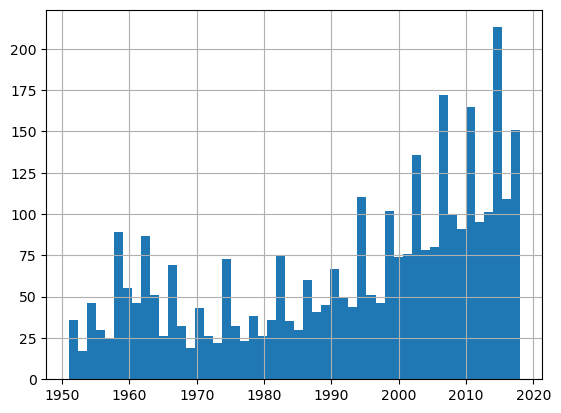

In [130]:
shark[shark['year']<2020]['year'].hist(bins=50);   #Distribucion de los ataques desde 1950

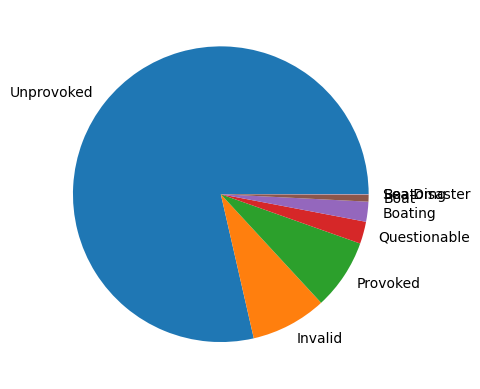

In [131]:
m = shark['Type'].value_counts()          #'Unprovoked'la mayoria de los ataques no son provocados por las personas
n = shark['Type'].unique()
plt.pie(m, labels=n)
plt.show()

In [140]:
#filtramos por los países que nos interesa analizar y los ataques provocados por tiburones

v = shark[(shark['Species']=='White shark') & 
                ((shark['Country']=='USA') | 
                (shark['Country']=='AUSTRALIA') | 
                (shark['Country']=='SOUTH AFRICA'))
               ]
v

,year,Case Number,Real_Date,Country,Area,Location,Type,Activity,Name,Age,Sex,Fatal,Injury,Species,Time,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
22,2018,2018-04-24,24-04-2018,AUSTRALIA,Western Australia,"South Point, Gracetown",Unprovoked,Surfing,Nathan Burch,unknown,M,N,"No injury, shark struck his leg",White shark,Afternoon,"B. Myatt, GSAF",2018.04.24-Burch.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.24,2018.04.24,6281.0,0,0
34,2018,2018-04-03,03-04-2018,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Unprovoked,Surfing,Ross Spowart,19,M,N,Lacerations to left knee & lower leg,White shark,15h00,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269.0,0,0
40,2018,2018-02-23,23-02-2018,AUSTRALIA,New South Wales,"Little Congwong Beach, La Perouse",Unprovoked,Swimming,Anna Shurapey,55,F,N,Laceratons to right leg & foot,White shark,"19h00, Dusk","B. Myatt, GSAF",2018.02.23-Shurapey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.23,2018.02.23,6263.0,0,0
50,2018,2018-01-13,13-01-2018,AUSTRALIA,New South Wales,Martin Islet,Unprovoked,Diving,Callum Stewart,28,M,N,"No injury, shark took his swimfin",White shark,unknown,"B. Myatt, GSAF",2018.01.13-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.13,2018.01.13,6253.0,0,0
60,2017,2017-11-24,24-11-2017,USA,California,"Stillwater Cove, Monterey County",Unprovoked,Spearfishing,Grigor Azatian,25,M,N,Right leg bitten,White shark,13h45,"R. Collier, GSAF",2017.11.24-Azatian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.24,2017.11.24,6243.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,1952,1952-12-07,07-12-1952,USA,California,"Pacific Grove, Monterey Bay, Monterey County",Unprovoked,Surfing,Barry Wilson,17,M,Y,"FATAL, leg lacerated",White shark,14h00,"R. L. Bolin, D. Miller & R. Collier, R. Skocik...",1952.12.07-Wilson_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.12.07,1952.12.07,1904.0,0,0
4410,1952,1952-05-27,27-05-1952,USA,California,"Imperial Beach, San Diego County",Unprovoked,Surfing,"Arthur E. Taylor, a navy diver & member+G1053 ...",unknown,M,N,Foot & swimfin bitten,White shark,10h00 or 14h00,"R. Collier, pp.8-9",1952.05.27-Taylor_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.05.27,1952.05.27,1893.0,0,0
4413,1952,1952-04-06,06-04-1952,AUSTRALIA,South Australia,Streaky Bay,Boating,Fishing,25' cutter,unknown,unknown,N,No injury to fisherman Alf Dean & other occupa...,White shark,Morning,"Recorder (Port Pirie), 4/7/1952",1952.04.06-AlfDean.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.04.06,1952.04.06,1890.0,0,0
4427,1951,1951-11-29,29-11-1951,SOUTH AFRICA,KwaZulu-Natal,"South Beach, Durban",Unprovoked,Swimming,Harold Tait,23,M,N,Thigh bruised & abraded,White shark,13h00,"G. Plowman, M. Levine, GSAF",1951.11.29-Tait.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1951.11.29,1951.11.29,1876.0,0,0


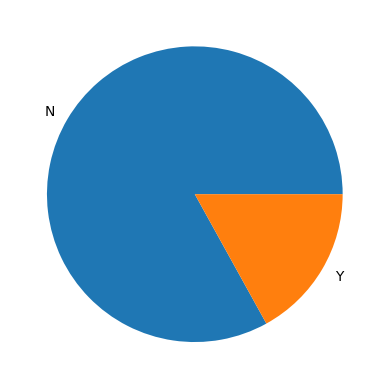

In [143]:
w = v['Fatal'].value_counts()          #La mayoria de ataques de White Shark no son fatales
x = v['Fatal'].unique()
plt.pie(w, labels=x)
plt.show()

<AxesSubplot:title={'center':'Total White Shark Attacks'}, xlabel='Country'>

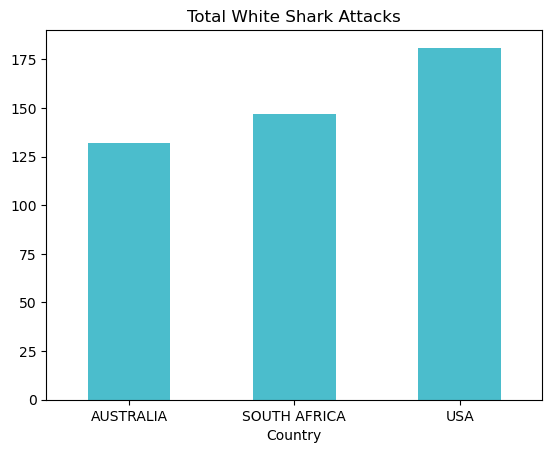

In [144]:
v.groupby(['Country']).size().plot(kind='bar',stacked=True, rot=0, 
                                          title="Total White Shark Attacks", color="#4bbdcc") #como se distribuyen los ataques de white shark es los paises seleccionados

In [147]:
filtro_actividad = shark[(shark['Species']=='White shark') & ((shark['Activity']=='Swimming') | (shark['Activity']=='Surfing ') | (shark['Activity']=='Spearfishing  ') | (shark['Activity']=='Diving')|(shark['Activity']=='Fishing'))]

<AxesSubplot:title={'center':'Total White Shark Attacks'}, xlabel='Activity'>

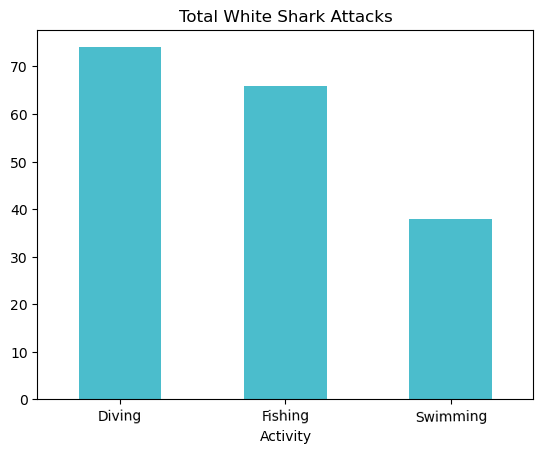

In [149]:
filtro_actividad.groupby(['Activity']).size().plot(kind='bar',stacked=True, rot=1, 
                                          title="Total White Shark Attacks", color="#4bbdcc")

In [ ]:
#La mayoria de los ataques de los 'White Shark' es por la actividad de 'Diving'

In [150]:
shark.to_csv("shark.csv", index=False)